<a href="https://colab.research.google.com/github/AqoU-dayo/22_2_DataScience/blob/main/201910529_kwonwoojin_subway.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 사이언스 1차과제 : 지하철 유무임승하차/ 시간별 승하차 데이터 이용

# 1번 ) CSV 파일 업로드

In [ ]:
# 한글 폰트 문제
# 2번째에서 나눔고딕 글씨체를 다운 받은 후
# plt.rc에서 적용한뒤
# 런타임 다시시작을 누르고
# 폰트 확인용 코드에서 나눔고딕이 있을 시 한글이 출력됩니다
# 런타임 다시시작을 하지 않을시 나눔고딕체가 다운받지 않아 깨져서 나오게 됩니다
# 아래의 폰트 확인 용 코드를 실행하고 나눔고딕체가 있을시 나머지 코드를 실행하면 정상적으로 한글이 출력됩니다

# 데이터사이언스 과제 1번 : CSV파일 가져오기
# 과제를 위한 지하철 이용 데이터 파일을 업로드 하기 위한 코드입니다 
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving subwayfee_200207.csv to subwayfee_200207 (1).csv
Saving subwaytime_202207.csv to subwaytime_202207 (1).csv
User uploaded file "subwayfee_200207.csv" with length 44279 bytes
User uploaded file "subwaytime_202207.csv" with length 229221 bytes


+) 한글폰트를 다운받기 위함

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

+) 업로드한 파일이 제대로 들어갔는지 확인

In [ ]:
!ls

 sample_data		     subwayfee_200207.csv	  subwaytime_202207.csv
'subwayfee_200207 (1).csv'  'subwaytime_202207 (1).csv'


+) 다운받았던 글자를 업데이트 하기 위함 -> 실행 후 "런타임 다시실행" 필요!!!!

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

+) 시스템 내에 폰트가 제대로 들어갔는지 확인하기 위한 코드

In [ ]:
# 시스템 내의 폰트 확인 용으로 임시로 넣어뒀습니다!
import matplotlib.font_manager as fonm
font_list = [font.name for font in fonm.fontManager.ttflist]
for f in font_list:
  print(f"{f}.ttf")

STIXSizeFiveSym.ttf
cmtt10.ttf
DejaVu Serif.ttf
STIXSizeTwoSym.ttf
DejaVu Sans Display.ttf
DejaVu Serif.ttf
STIXSizeFourSym.ttf
DejaVu Sans.ttf
STIXSizeOneSym.ttf
STIXSizeFourSym.ttf
STIXSizeTwoSym.ttf
DejaVu Sans Mono.ttf
STIXSizeOneSym.ttf
cmex10.ttf
cmmi10.ttf
DejaVu Serif.ttf
DejaVu Sans.ttf
cmss10.ttf
cmb10.ttf
STIXSizeThreeSym.ttf
STIXGeneral.ttf
STIXGeneral.ttf
STIXGeneral.ttf
cmsy10.ttf
DejaVu Sans Mono.ttf
DejaVu Serif Display.ttf
DejaVu Sans.ttf
DejaVu Sans.ttf
STIXNonUnicode.ttf
STIXNonUnicode.ttf
STIXSizeThreeSym.ttf
STIXNonUnicode.ttf
DejaVu Serif.ttf
STIXGeneral.ttf
DejaVu Sans Mono.ttf
cmr10.ttf
STIXNonUnicode.ttf
DejaVu Sans Mono.ttf
NanumGothic.ttf
Liberation Sans.ttf
Liberation Sans Narrow.ttf
Liberation Sans.ttf
Liberation Serif.ttf
Liberation Serif.ttf
Liberation Sans Narrow.ttf
NanumMyeongjo.ttf
Liberation Sans Narrow.ttf
NanumBarunGothic.ttf
NanumMyeongjo.ttf
Liberation Sans.ttf
NanumGothic.ttf
Liberation Serif.ttf
NanumBarunGothic.ttf
Liberation Mono.ttf
NanumSqu

# 2번 ) CSV 파일 읽어오기

In [ ]:
# 데이터 사이언스 과제 2번 : CSV 파일 읽어오기 (유무임승차 파일)
import csv
import matplotlib
import matplotlib.pyplot as plt
import os
# 한글로 된 csv파일을 정상적으로 읽기 위해 파일을 읽을 때 UTF-8형식으로 인코딩하였습니다
file = open("subwayfee_200207.csv", encoding = 'UTF-8')
data = csv.reader(file)

# 제일 윗 줄을 제외하고 출력하기 위해 next()함수를 사용해 header라는 변수에 저장해두었습니다
store = next(data)

# 데이터 파일을 행 단위로 읽어 list형식으로 출력되게 하였습니다.
for row in data:
  print(row)
# 다음 파일을 불러오기 위해 읽어온 파일을 닫았습니다
file.close()

['2022-07', '1호선', '0150', '서울역', '1,178,560', '1,155,976', '185,391', '177,482']
['2022-07', '1호선', '0151', '시청', '560,694', '579,162', '77,616', '75,185']
['2022-07', '1호선', '0152', '종각', '873,248', '859,739', '130,570', '122,713']
['2022-07', '1호선', '0153', '종로3가', '458,115', '421,288', '289,163', '271,350']
['2022-07', '1호선', '0154', '종로5가', '391,730', '398,753', '250,953', '241,190']
['2022-07', '1호선', '0155', '동대문', '213,813', '199,177', '117,833', '117,731']
['2022-07', '1호선', '0156', '신설동', '270,190', '263,271', '114,122', '110,121']
['2022-07', '1호선', '0157', '제기동', '222,775', '213,805', '262,096', '279,438']
['2022-07', '1호선', '0158', '청량리(서울시립대입구)', '326,388', '325,962', '247,835', '251,367']
['2022-07', '1호선', '0159', '동묘앞', '123,378', '129,906', '144,443', '146,108']
['2022-07', '2호선', '0201', '시청', '584,537', '565,137', '50,555', '45,919']
['2022-07', '2호선', '0202', '을지로입구', '1,041,508', '1,070,432', '93,032', '87,182']
['2022-07', '2호선', '0203', '을지로3가', '562,241', '568,

In [ ]:
# 데이터 사이언스 과제 2번 : CSV 파일 읽어오기(승하차 시간대 파일)
# 한글로 된 csv파일을 정상적으로 읽기 위해 파일을 읽을 때 UTF-8형식으로 인코딩하였습니다

#위와 같이 UTF-8형식으로 subwaytime_202207.csv.파일을 불러왔습니다
file = open("subwaytime_202207.csv", encoding = 'UTF-8')
data = csv.reader(file)

# 제일 윗 줄을 제외하고 출력하기 위해 next()함수를 사용해 header라는 변수에 저장해두었습니다
# 추가적으로 다음 csv 파일에는 시간과 승하차로 2개의 줄이 나열되어있어
# 두번의 next()함수를 통해 데이터가 들어있는 행부터 읽을수있게 하였습니다
store1 = next(data)
store2 = next(data)

#데이터 파일을 행단위로 읽어 list형식으로 출력되게 하였습니다
for row in data:
  print(row)

# 읽어왔던 파일을 닫았습니다
file.close()



['2022-07', '1호선', '150', '서울역', '511', '13', '9,109', '8,251', '12,723', '45,371', '39,553', '104,056', '64,302', '206,824', '52,500', '136,248', '55,011', '73,582', '67,533', '62,972', '76,765', '72,532', '78,052', '71,213', '64,077', '63,636', '84,230', '67,595', '99,665', '69,281', '147,521', '82,630', '197,050', '89,167', '96,556', '57,677', '69,940', '41,748', '76,212', '36,900', '50,850', '26,906', '21,230', '14,178', '561', '2,478', '0', '200', '0', '0', '0', '0']
['2022-07', '1호선', '151', '시청', '62', '0', '2,088', '4,739', '3,453', '24,482', '6,471', '67,255', '8,467', '184,731', '9,632', '80,356', '11,552', '36,272', '18,409', '35,521', '20,743', '35,140', '24,852', '35,582', '30,722', '29,084', '40,174', '24,101', '49,777', '21,515', '81,253', '22,849', '152,949', '22,283', '52,347', '10,314', '44,129', '6,455', '43,228', '5,904', '28,380', '4,286', '9,340', '2,845', '281', '619', '1', '14', '0', '0', '0', '0']
['2022-07', '1호선', '152', '종각', '44', '0', '3,600', '4,437', '3,

# 3번 ) 유무임 승하차 비율 계산해서 파이그래프로 표현

유무임승하차 비율을 알고싶은 역을 입력하세요 : 강남구청
유무임승하차 비율을 알고싶은 역의 호선을 입력하세요 : 7호선


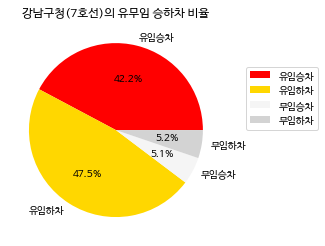

In [ ]:
# 데이터 사이언스 과제 3번 : 유무임승하차 비율을 계산해서 Pie Graph로 표현하기
# 조건) Title과 Legend를 그래프에 보이게하고, 계산시 NULL Value를 적절히 처리한다
# 특정역에대한 유무임 승하차 비율
# 특정역에대한 유무임승하차 비율을 알기위한 csv 파일을 불러왔습니다2
file = open("subwayfee_200207.csv", encoding = 'UTF-8')
data = csv.reader(file)

#월활한 데이터 추출을 위해 첫번째 줄을 store에 저장 후 다음 행부터 읽게 했습니다
store = next(data)
# USER가 찾고자하는 역의 데이터를 입력받기 위해 역을 입력받는 변수 subwaystation에 input받도록 했습니다
# 단 여기서 역은 우리가 흔히 아는 역이름이 아니라 추가 부여된 이름 군자(능동)역 일때 오류가 날 수 있는 것에 주의해야합니다
subwaystation = input("유무임승하차 비율을 알고싶은 역을 입력하세요 : ")

# 호선이 교차하는 것을 방지 하기 위해 추가적으로 subwayline이라는 변수를 선언해 추가적으로 입력받도록 했습니다
# ex) 건대입구 / 2호선 or 건대입구 / 7호선
subwayline = input("유무임승하차 비율을 알고싶은 역의 호선을 입력하세요 : ")

# PIE Graph를 완성하기 위해 subway_onoff에 값에대한 설명 explode를 통해 그래프 요소간의 간격을주고
# Color로 색을 달리 하였습니다
# 유무임승하차의 경우의 수는 총 4가지 이므로 크기가 4인 배열로 선언하였습니다
subway_onoff = ["유임승차","유임하차","무임승차","무임하차"]
explode = [0.05, 0.05, 0.05, 0.05]
colors = ['Red', 'gold', 'whitesmoke', 'lightgray']

# 유무임승하차간의 비율을 저장하기위한 list를 생성하였습니다
subway_ratio = []

for row in data:
  # 찾고자 하는 역의 이름과 호선의 이름이 일치하는 경우 그 행에서만 진행되도록 했습니다
  if(subwaystation == row[3]):
    if(subwayline == row[1]):
      # 4개의 변수에 문자열을 정수로 변환한 값을 임시로 담도록 하였습니다
      paid_ride = int(row[4].replace(',', ''))
      paid_off = int(row[5].replace(',', ''))
      free_ride = int(row[6].replace(',', ''))
      free_off = int(row[7].replace(',', ''))

      # 서로간의 비율을 알기 위해 total이라는 변수에 총합을 저장했습니다
      total = paid_ride + paid_off + free_ride + free_off

      # 알고자하는 배열이 4개이므로 앞서 선언해둔 list에 append를 통한 방식보다 insert를 통해 값을 넣었습니다
      subway_ratio.insert(0, paid_ride/total*100)
      subway_ratio.insert(1, paid_off/total*100)
      subway_ratio.insert(2, free_ride/total*100)
      subway_ratio.insert(3, free_off/total*100)

# 원형그래프의 제목, 형태, 그리고 우측에 legend를 표시한채로 출력되게 하였습니다
# 버그때문에 크기가 올바르지 않을수도 있습니다. 데이터가 뭉게질시 실행을 다시 반복하면 정상적으로 풀립니다
plt.title(f"{subwaystation}({subwayline})의 유무임 승하차 비율")
plt.pie(subway_ratio, labels=subway_onoff, autopct='%.1f%%', colors=colors)
plt.legend(loc = (1.1, 0.5))
plt.show()
file.close()

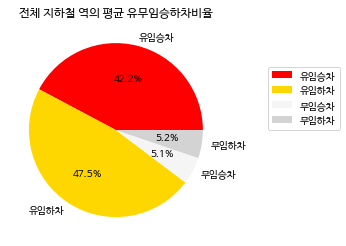

In [ ]:
# 데이터 사이언스 과제 3번 : 유무임승하차 비율을 계산해서 Pie Graph로 표현하기
# 조건) Title과 Legend를 그래프에 보이게하고, 계산시 NULL Value를 적절히 처리한다
# 전체 역에 대한 유무임승하차 비율

# 유무임승차가 담겨있는 파일을 불러왔습니다
file = open("subwayfee_200207.csv", encoding = 'UTF-8')
data = csv.reader(file)

# 정보가 아닌 첫째줄을 넘기기 위해 next()함수를 사용했습니다
header = next(data)

# 파이그래프에 표시할 요소들을 선언했습니다
# 몇가지 비율을 어떤명칭으로 나눌지 - label
subway_onoff = ["유임승차","유임하차","무임승차","무임하차"]
# 원형그래프에서 값들이 차지하는 공간간의 간격
explode = [0.05, 0.05, 0.05, 0.05]
# 값이 원형그래프에서 표현하는 색
colors = ['Red', 'gold', 'whitesmoke', 'lightgray']
# 전체 평균을 담기 위해 row의 값들을 더한 후 평균을 내서 저장하기 위한 임시 list공간을 만들었습니다
subway_ratio1 = []

# 반복문 진입
for row in data:
  # 불러오고자하는 데이터를 각 열 단위로 정수화함과 동시에 선언해둔 변수에 지속적으로 더함으로서 총합을 계산했습니다
  paid_ride += int(row[4].replace(',', ''))
  paid_off += int(row[5].replace(',', ''))
  free_ride += int(row[6].replace(',', ''))
  free_off += int(row[7].replace(',', ''))

# 비율을 계산하기 위해서 4개의 총합을 합한 total값을 도출해냈습니다
total = paid_ride + paid_off + free_ride + free_off

# 위에서 구한 total값을 이용하여 비율을 계산하고 앞에서 선언한 subway_ratio에 선언하였습니다
# row의 길이를 통하여 반복문으로 리스트의 크기를 선언하는게 더 정확하지만
# 알고자하는 것이 유임승차, 유임하차, 무임승차, 무임하차 4가지이므로 insert 방식을 사용하였습니다
subway_ratio1.insert(0, paid_ride/total*100)
subway_ratio1.insert(1, paid_off/total*100)
subway_ratio1.insert(2, free_ride/total*100)
subway_ratio1.insert(3, free_off/total*100)

#그리고자 하는 원형그래프의 제목과, 타입을 입력하고 legend 역시 우측에 뜨도록 하였습니다
# 버그때문에 크기가 올바르지 않을수도 있습니다. 데이터가 뭉게질시 실행을 다시 반복하면 정상적으로 풀립니다
plt.title("전체 지하철 역의 평균 유무임승하차비율")
plt.pie(subway_ratio, labels=subway_onoff, autopct='%.1f%%', colors=colors)
plt.legend(loc = (1.2, 0.5))
plt.show()

file.close()

# 4번 ) 전체역의 평균 승하차 수를 시간대 별로 표현

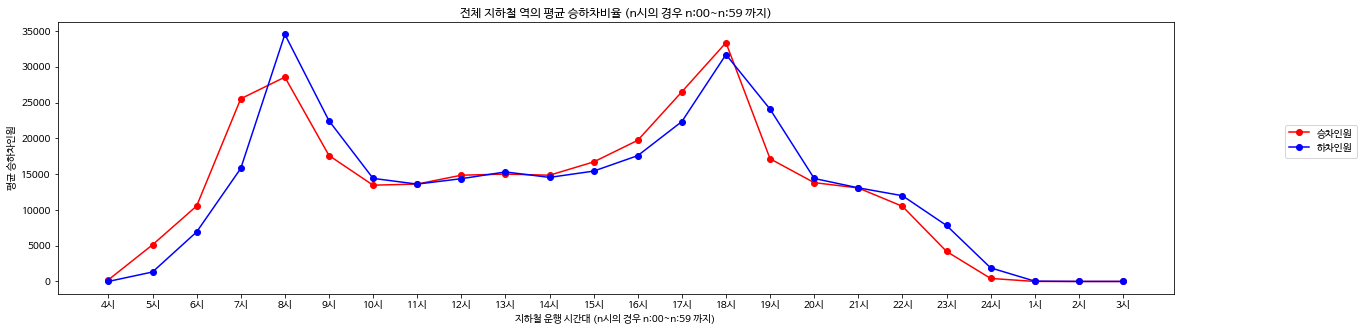

In [ ]:
# 데이터 사이언스 과제 4번 : 전체역의 평균 승차 수, 하차 수를 시간대 별로 계산해서 승차와 하차를 두개의 라인으로
# 시간대별로 알 수 있는 그래프를 만들기 (Title과 Legend 등 필요한 정보를 그래프에 포함할 것)
file = open("subwaytime_202207.csv", encoding = 'UTF-8')
data = csv.reader(file)
header = next(data)
header1 = next(data)
times = []
get_onoff = []

# 승하차 인원을 담을 list와 시간대를 담을 list 2개를 작성합니다
for i in range(4, len(header1)):
  get_onoff.append(0)
  if i<28:
    times.append(0)
  else:
    continue

# 시간대 list에 각각 시간을 반복문을 통해 집어넣었습니다
for i in range(4, 28):
  if i>24:
    times[i-4] = f'{i-24}시'
  else:
    times[i-4] = f'{i}시'

# 반복문 시작
# count를 통해 평균을 구하기 전 전체 역 수를 체크할 수 있도록 하였습니다
count = 0
for row in data:
  count+=1
  # 이중 반복문을 통해 앞서 선언한 get_onoff list에 각 시간대별 승하차 인원이 들어가서 누적합이 이루어지는 구성을 짜보았습니다
  for i in range(4, len(header1)):
    row[i] = int(row[i].replace(',', ''))
    get_onoff[i-4] += row[i]

# 반복문을 나와 누적합이 되었을때 앞서 구했던 count, 즉 전체 역수를 각각의 list의 값에 나누어 주도록했습니다
for i in range(0, len(get_onoff)):
  get_onoff[i] /= count

# 코딩과정에서 요소들이 바르게 들어갔는지 체크하기 위해 작성하였습니다
# print(count)
# print(times)
# print(get_onoff[0::2])
# print(get_onoff[1::2])

# 앞에서 구한 요소들을 토대로 선형그래프를 구현하였습니다
# 버그때문에 크기가 올바르지 않을수도 있습니다. 데이터가 뭉게질시 실행을 다시 반복하면 정상적으로 풀립니다
plt.plot(times, get_onoff[0::2],color = "red", marker='o')
plt.plot(times, get_onoff[1::2],color = "blue", marker='o')
plt.title("전체 지하철 역의 평균 승하차비율 (n시의 경우 n:00~n:59 까지)")
plt.xlabel('지하철 운행 시간대 (n시의 경우 n:00~n:59 까지)')
plt.ylabel('평균 승하차인원')   
plt.legend(['승차인원','하차인원'], loc = (1.1, 0.5))
plt.rcParams['figure.figsize'] = [13, 5]

plt.xticks(times)

file.close()




시간대 별 승하차 인원을 알고싶은 역을 입력하세요 : 건대입구
시간대 별 승하차 인원을 알고싶은 역의 호선을 입력하세요 : 2호선


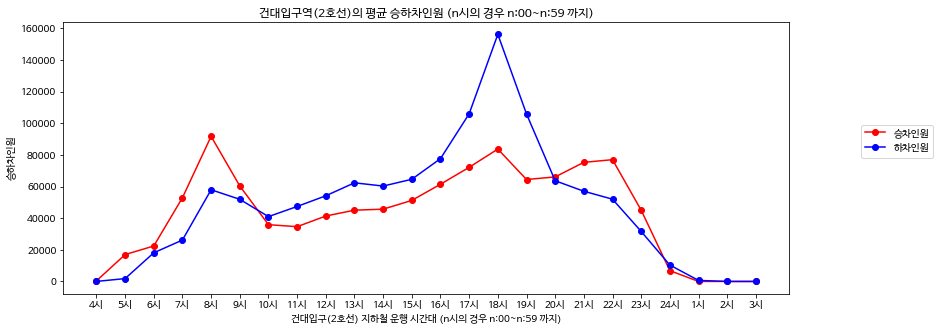

In [ ]:
# 데이터 사이언스 과제 4번 : 특정역의 승차 수, 하차 수를 시간대 별로 계산해서 승차와 하차를 두개의 라인으로
# 시간대별로 알 수 있는 그래프를 만들기 (Title과 Legend 등 필요한 정보를 그래프에 포함할 것)
file = open("subwaytime_202207.csv", encoding = 'UTF-8')
data = csv.reader(file)
header = next(data)
header1 = next(data)
times = []
get_onoff = []

# 승하차 인원을 담을 list와 시간대를 담을 list 2개를 작성합니다
for i in range(4, len(header1)):
  get_onoff.append(0)
  if i<28:
    times.append(0)
  else:
    continue

# 시간대 list에 각각 시간을 반복문을 통해 집어넣었습니다
for i in range(4, 28):
  if i>24:
    times[i-4] = f'{i-24}시'
  else:
    times[i-4] = f'{i}시'

# USER가 찾고자하는 역의 데이터를 입력받기 위해 역을 입력받는 변수 subwaystation에 input받도록 했습니다
# 단 여기서 역은 우리가 흔히 아는 역이름이 아니라 추가 부여된 이름 군자(능동)역 일때 오류가 날 수 있는 것에 주의해야합니다
subwaystation = input("시간대 별 승하차 인원을 알고싶은 역을 입력하세요 : ")

# 호선이 교차하는 것을 방지 하기 위해 추가적으로 subwayline이라는 변수를 선언해 추가적으로 입력받도록 했습니다
# ex) 건대입구 / 2호선 or 건대입구 / 7호선
subwayline = input("시간대 별 승하차 인원을 알고싶은 역의 호선을 입력하세요 : ")

# 반복문 시작
for row in data:
  # 찾고자 하는 역의 이름과 호선의 이름이 일치하는 경우 그 행에서만 진행되도록 했습니다
  if(subwaystation == row[3]):
    if(subwayline == row[1]):
      # 4개의 변수에 문자열을 정수로 변환한 값을 임시로 담도록 하였습니다
      for i in range(4, len(header1)):
        row[i] = int(row[i].replace(',', ''))
        get_onoff[i-4] = row[i]

# 앞에서 구한 요소들을 토대로 선형그래프를 구현하였습니다
# 버그때문에 크기가 올바르지 않을수도 있습니다. 데이터가 뭉게질시 실행을 다시 반복하면 정상적으로 풀립니다
plt.plot(times, get_onoff[0::2],color = "red", marker='o')
plt.plot(times, get_onoff[1::2],color = "blue", marker='o')
plt.title(f"{subwaystation}역({subwayline})의 평균 승하차인원 (n시의 경우 n:00~n:59 까지)")
plt.xlabel(f'{subwaystation}({subwayline}) 지하철 운행 시간대 (n시의 경우 n:00~n:59 까지)')
plt.ylabel('승하차인원')   
plt.legend(['승차인원','하차인원'], loc = (1.1, 0.5))
plt.xticks(times)
plt.rcParams['figure.figsize'] = [13, 5]

file.close()

# 5번 ) 시간대별로 승차인원이 많은 역을 막대그래프로 표현

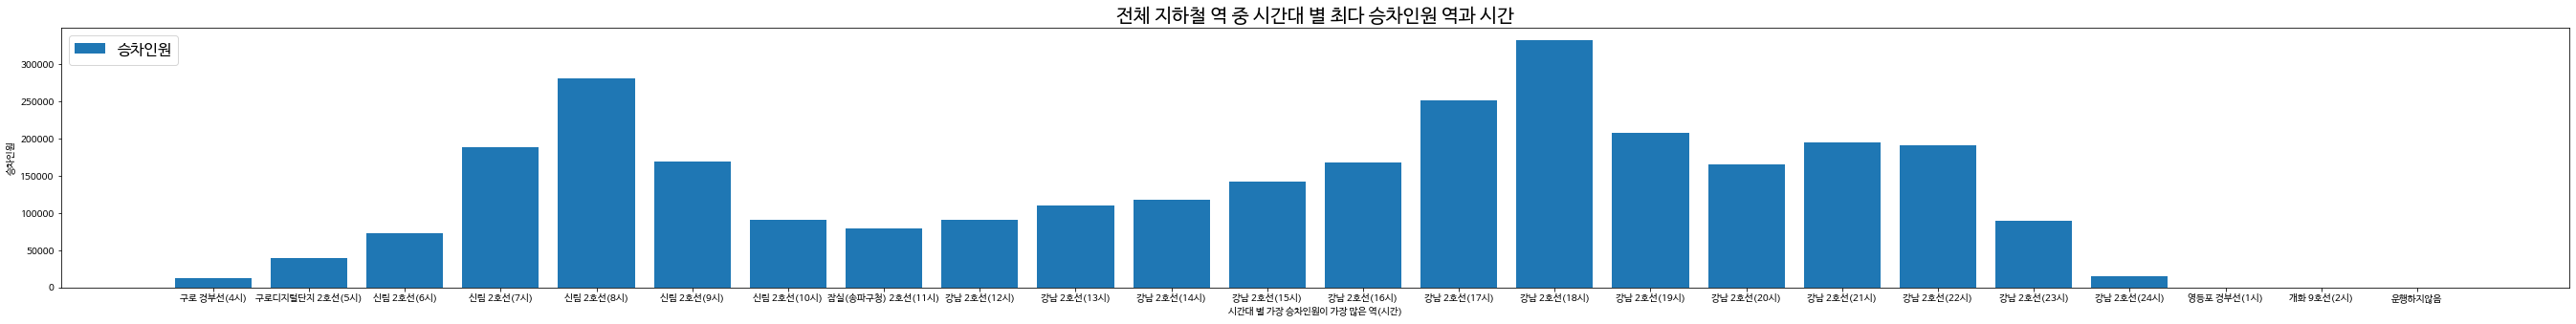

In [ ]:
# 데이터 사이언스 과제 5번 : 시간대별로 승차 인원이 많은 역을 막대 그래프로 표현하세요
# Title과 Legend등 필요한 정보를 그래프에 포함시키세요
# X - 역이름(시간대) [ex) 건대입구(4시)] / Y - 승차인원수

# 시간별 승차인원을 알기위해 subywaytime_202207.csv 파일을 열었습니다
file = open("subwaytime_202207.csv", encoding = 'UTF-8')
data = csv.reader(file)

# 데이터가 없는 줄의 오류를 방지하기 위해 next()함수를 이용해 2줄을 넘겨 data를 읽도록했습니다
header = next(data)
header1 = next(data)

# 최다 승차 인원이 몇명인지 담기위한 best_choice list와, 대상 역과 시간을 담기위한 best list를 2개 선언했습니다
best_choice = []
best = []

# 각 24시간 별로 최다 승차 인원을 담을 것이므로 크기가 24개인 배열을 2개 선언했습니다
for i in range(0, 24):
    best_choice.append(0)
    best.append(0)

# 반복문 시작
for row in data:
  # 현재 반복문으로는 04~03시까지 전체 승하차인원, 즉 크기가 48이 되어버리므로 csv파일상 짝수번째에 위치한 데이터만 반복문을 통해 읽도록했습니다
  for i in range(4, len(header1),2):
    row[i] = int(row[i].replace(',', ''))
    # count는 앞처럼 시간과 관련된 list를 하나 더 짜지 않고 한번에 list를 정립하기 위해 변수를 사용했습니다
    count = int(i/2)
    # 처음에 전부 0을 담아두고 이후 담겨있는 수보다 읽어드린 수가 더 크다면 그 수로 대체 하는 식으로 if문을 작성하였습니다
    if (best_choice[count-2] < row[i]):
      best_choice[count-2] = row[i]
      # 그리고 곧이어 best list에 그 역과 시간을 저장하도록 하여 최다 인원 탑승 수와 그 역(시간)이 매칭되도록 하였습니다
      best[count-2] = f"{row[3]} {row[1]}({count+2}시)"
      #count가 연속될시 25시 처럼 넘어갈 수 있으므로 if문을 써서 그럴경우 0시로 초기화 되게 하였습니다
      if count+2 > 24:
        best[count-2] = f"{row[3]} {row[1]}({count+2-24}시)"

# 03시~04시에는 지하철을 운행하지 않기 때문에 이에 대한 error를 방지하기위해 best에 "운행하지 않음"이라고 표기했습니다
for i in range(0, 24):
  if(best[i] == 0):
    best[i] = "운행하지않음"

# list에 제대로 데이터가 담겨있는지 확인하기 위해 사용했었습니다
# print(best_choice)
# print(best)

# 위의 list에 담은 데이터를 이용하여 막대그래프를 만들었습니다. 역의 이름이 긴경우가 많아 plt.rcParams를 이용해 가로길이를 넉넉하게 잡아서 글씨가 작아보일수도 있습니다
# 버그때문에 크기가 올바르지 않을수도 있습니다. 데이터가 뭉게질시 실행을 다시 반복하면 정상적으로 풀립니다
plt.bar(best, best_choice)
plt.xticks(best, best)
plt.title("전체 지하철 역 중 시간대 별 최다 승차인원 역과 시간",fontsize = 20)
plt.xlabel('시간대 별 가장 승차인원이 가장 많은 역(시간)')
plt.ylabel('승차인원')
plt.rcParams['figure.figsize'] = [47, 5]
plt.legend(["승차인원"],loc = 'upper left', fontsize = 16)
plt.show()


file.close()

# 6번 ) 건대입구의 승하차 트랜드

In [ ]:
# 수정 전
'''
# 데이터 사이언스 과제 6번 : 건대입구역의 승하차 트렌드를 알 수 있는 그래프 만들기
# 그래프 종류를 선택한 이유와 그래프를 보고 얻은 insight를 python comments로 기술하세요
file = open("subwaytime_202207.csv", encoding = 'UTF-8')
data = csv.reader(file)
header = next(data)
header1 = next(data)
real_times = ["4시","5시","6시","7시","8시","9시","10시","11시","12시","13시","14시","15시","16시","17시","18시","19시","20시","21시","22시","23시","24시","1시","2시","3시"]

get_onoff = []

# USER가 찾고자하는 역의 데이터를 입력받기 위해 역을 입력받는 변수 subwaystation에 input받도록 했습니다
# 단 여기서 역은 우리가 흔히 아는 역이름이 아니라 추가 부여된 이름 군자(능동)역 일때 오류가 날 수 있는 것에 주의해야합니다
subwaystation = "건대입구"

# 호선이 교차하는 것을 방지 하기 위해 추가적으로 subwayline이라는 변수를 선언해 추가적으로 입력받도록 했습니다
# ex) 건대입구 / 2호선 or 건대입구 / 7호선
subwayline = input("유무임승하차 비율을 알고싶은 건대입구역의 호선을 입력하세요 (2호선 OR 7호선) : ")

for i in range(4, len(header1)):
  get_onoff.append(0)

for row in data:
  # 찾고자 하는 역의 이름과 호선의 이름이 일치하는 경우 그 행에서만 진행되도록 했습니다
  if(subwaystation == row[3]):
    if(subwayline == row[1]):
      # 4개의 변수에 문자열을 정수로 변환한 값을 임시로 담도록 하였습니다
      for i in range(4, len(header1)):
        row[i] = int(row[i].replace(',', ''))
        get_onoff[i-4] = row[i]

# My Choice : 선형 그래프 선택
# 전체적인 승차와 하차 인원수를 한눈에 보기 편하고, 특정시간대 승하차 인원 비율을 marker를 통해 위치를 판단하여 비교하기 쉽다고 판단했기 때문입니다
# +) 원형그래프와는 주제와 맞지 않고 막대그래프도 수치를 비교하기 편하지만 24시간 승하차 2개의 파트를 비교하기에는 가시성이 떨어진다고 생각했습니다

plt.plot(real_times, get_onoff[0::2],color = "red", marker='o')
plt.plot(real_times, get_onoff[1::2],color = "blue", marker='o')
plt.xlabel('건대입구역의 시간 당 승하차 인원')
plt.ylabel('승하차인원')   
plt.legend(['승차인원','하차인원'], loc = (1.1, 0.5))
plt.xticks(real_times)
plt.rcParams['figure.figsize'] = [13, 5]

file.close()
'''

승하차 인원을 알고싶은 건대입구역의 호선을 입력하세요 (2호선 OR 7호선) : 2호선


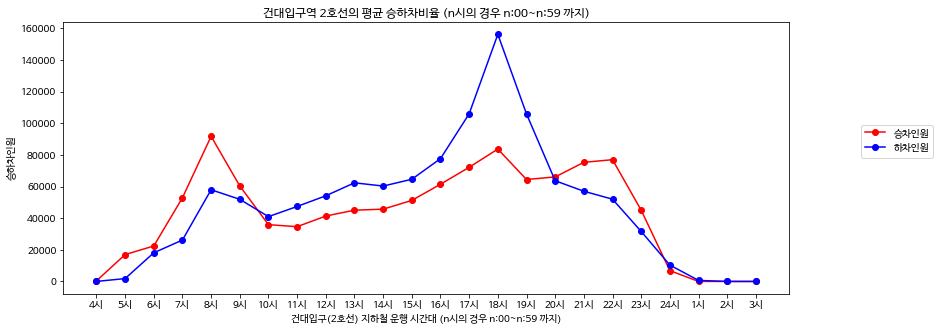

In [ ]:
#수정후

# 데이터 사이언스 과제 6번 : 건대입구역의 승하차 트렌드를 알 수 있는 그래프 만들기
# 그래프 종류를 선택한 이유와 그래프를 보고 얻은 insight를 python comments로 기술하세요
file = open("subwaytime_202207.csv", encoding = 'UTF-8')
data = csv.reader(file)
header = next(data)
header1 = next(data)

get_onoff = []
times=[]
# USER가 찾고자하는 역의 데이터를 입력받기 위해 역을 입력받는 변수 subwaystation에 input받도록 했습니다
# 단 여기서 역은 우리가 흔히 아는 역이름이 아니라 추가 부여된 이름 군자(능동)역 일때 오류가 날 수 있는 것에 주의해야합니다
subwaystation = "건대입구"

# 호선이 교차하는 것을 방지 하기 위해 추가적으로 subwayline이라는 변수를 선언해 추가적으로 입력받도록 했습니다
# ex) 건대입구 / 2호선 or 건대입구 / 7호선
subwayline = input("승하차 인원을 알고싶은 건대입구역의 호선을 입력하세요 (2호선 OR 7호선) : ")

# 승하차 인원을 담을 리스트와 x축을 담당할 시간을 담을 list를 선언해줍니다
for i in range(4, len(header1)):
  get_onoff.append(0)
  if i<28:
    times.append(0)
  else:
    continue

# 시간에 관한 list를 반복문을 통해 넣어주었으며, 24시간이 넘을시는 i-24로 01시부터 진행되도록했습니다
for i in range(4, 28):
  if i>24:
    times[i-4] = f'{i-24}시'
  else:
    times[i-4] = f'{i}시'

# 반복문 시작
for row in data:
   # 건대입구라는 문자열을 subwaystation에 저장한 후 이와 같은 행을 찾았고 그 행에서 다음이 진행되도록 하였습니다
   if(subwaystation == row[3]):
     # 건대입구처럼 여러개의 호선이 있는 경우 호선을 위에서 입력받아 오류가 나지 않도록 하였습니다
     if(subwayline == row[1]):
       # 건대입구 행에 나열되어있던 데이터를 get_onoff라는 list에 담았습니다
       for i in range(4, len(header1)):
         row[i] = int(row[i].replace(',', ''))
         get_onoff[i-4] = row[i]

# My Choice : 선형 그래프 선택
# 전체적인 승차와 하차 인원수를 한눈에 보기 편하고, 특정시간대 승하차 인원 비율을 marker를 통해 위치를 판단하여 비교하기 쉽다고 판단했기 때문입니다
# +) 원형그래프와는 주제와 맞지 않고 막대그래프도 수치를 비교하기 편하지만 24시간 승하차 2개의 파트를 비교하기에는 가시성이 떨어진다고 생각했습니다

# 앞에서 구한 요소들을 토대로 선형그래프를 구현하였습니다
# 버그때문에 크기가 올바르지 않을수도 있습니다. 데이터간의 간격이 너무 클때와 작을때, 그리고 데이터가 뭉게질시 실행을 다시 반복하면 정상적으로 풀립니다
plt.plot(times, get_onoff[0::2],color = "red", marker='o')
plt.plot(times, get_onoff[1::2],color = "blue", marker='o')
plt.title(f"건대입구역 {subwayline}의 평균 승하차비율 (n시의 경우 n:00~n:59 까지)")
plt.xlabel(f'{subwaystation}({subwayline}) 지하철 운행 시간대 (n시의 경우 n:00~n:59 까지)')
plt.ylabel('승하차인원')   
plt.legend(['승차인원','하차인원'], loc = (1.1, 0.5))
plt.xticks(times)
plt.rcParams['figure.figsize'] = [13, 5]

file.close()

# 다음 그래프 표현으로 출퇴근 및 통학학생이 많이 몰리는 7~8시 시간대와 17~18시간대에 사람이 많이 몰리고 있으며
# 특히 하차인원이 많은 것으로 보아 건대입구 근처는 거주지 용도보다 업무 및 학습용도주도의 지역의 모습이 조금 더 강하다고 추측해 볼 수 있었습니다

# 7번 ) 자율주제 : 이 시간 어떤 역이 제일 붐비는지 알고싶어!

알고싶은 시간대를 입력하세요 (1~24) : 22


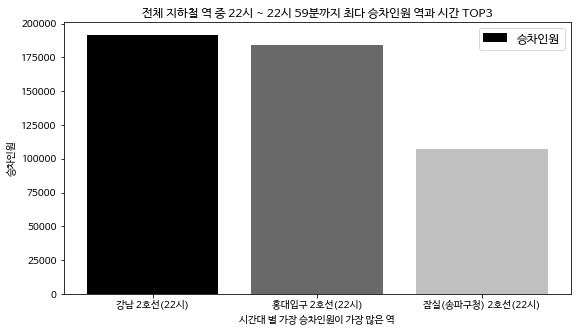

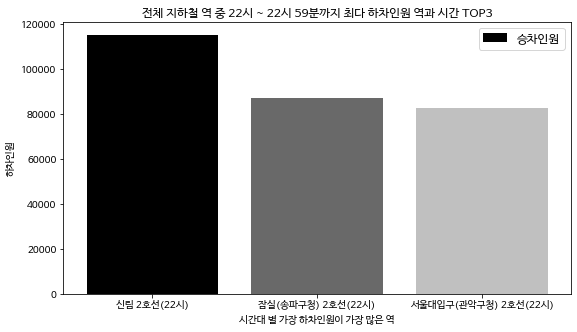

In [ ]:
# 데이터 사이언스 과제 7번 : 자율주제
# 특정시간 가장 몰리는 역 탑 3를 그래프로 만들어라
# "이 시간에 사람이 가장 몰리는 역을 알려줘!!!"
# 출근시간대 퇴근시간대를 나아가 언제 어디서 사람이 가장 몰리는지 알 수 있는 지표로 활용될 수 있을 것이라고 생각

# 시간별 승차인원을 알기위해 subywaytime_202207.csv 파일을 열었습니다
file = open("subwaytime_202207.csv", encoding = 'UTF-8')
data = csv.reader(file)

# 데이터가 없는 줄의 오류를 방지하기 위해 next()함수를 이용해 2줄을 넘겨 data를 읽도록했습니다
header = next(data)
header1 = next(data)

# 최다 승차인원 top3를 담을 best_on 리스트와 최다 하차인원 top3를 담을 best_off 리스트
# 최다 승하차인원 top3의 역을 담아둘 beststation 리스트 2개
# 그리고 조금더 구분감있게 그래프를 그리기 위한 colors 리스트를 선언했습니다
best_on = []
best_off = []
beststation_on = []
beststation_off = []
colors = ['black','dimgray','silver']


# 최다 승하차 인원 top3를 담을 것이므로 크기가 3개인 배열을 4개 선언했습니다
for i in range(0, 3):
    best_on.append(0)
    best_off.append(0)
    beststation_on.append(0)
    beststation_off.append(0)


# 알고싶은 시간대 입력받기
# 오전 3시부터 3시 59분 사이에는 데이터가 없기 때문에 3시를 입력시 다시 입력하도록 했습니다
while(1):
  time = int(input("알고싶은 시간대를 입력하세요 (1~24) : "))
  if time == 3:
    print("3시부터 3시59분 사이에는 지하철이 운행하지 않습니다")
  elif time > 24:
    print("시간이 올바르지 않습니다")
  elif time <= 0:
    print("시간이 올바르지 않습니다")
  else:
    if(time <= 3):
      time += 24
    break

# 데이터가 제대로 들어갔는지 확인해보았습니다
# print(len(header1))
# print(time)

#반복문 시작
for row in data:
  # 특정시간대 top3를 구하는 과정에서 두 반복문을 분리하지 않을시 수와 문자열이 더해지는 경우가 발생할수 있으므로
  # 정수로 변환하는 반복문과 top3를 찾아내는 반복문을 분리하였습니다
  for i in range(4, len(header1)):
    row[i] = int(row[i].replace(',', ''))      

  # 특정시간대 승차 TOP3를 구하는 과정
  # 리스트 0 1 2 에서 우선 list 2번과 비교하고 데이터가 더 클경우 1번과, 그다음 0번과 순차적으로 비교하는 구성을 if문을 통해 구현하였습니다     
  if(row[time*2-4] > best_on[2]):
      # 제일 마지막인 3등인 리스트[2]보다 데이터가 작게될 경우 top3집계에는 필요가 없으므로 따로 보관해둘 변수를 설정하지 않았습니다
      best_on[2] = row[time*2-4]
      beststation_on[2] = f"{row[3]} {row[1]}({time}시)"
      if(time>23):
        beststation_on[2] = f"{row[3]} {row[1]}({time-24}시)"
      
      # 리스트 1번과 비교할때에는 만약에 1번이 찾고자하는 데이터보다 작으면 2번으로 옮겨져야 하기 때문에
      # 임시로 보관할 b라는 변수를 선언해두었습니다
      if(best_on[2]>best_on[1]):
        b = best_on[1]
        b_s = beststation_on[1]

        best_on[1] = best_on[2]
        beststation_on[1] = beststation_on[2]

        best_on[2] = b
        beststation_on[2] = b_s

        # 위와 같이 리스트 0번과 비교할때에는 만약에 0번이 찾고자하는 데이터보다 작으면 21번으로 옮겨져야 하기 때문에
        # 임시로 보관할 c라는 변수를 선언해두었습니다
        if(best_on[1]>best_on[0]):
            c=best_on[0]
            c_s=beststation_on[0]

            best_on[0] = best_on[1]
            beststation_on[0] = beststation_on[1]

            best_on[1] = c
            beststation_on[1] = c_s

# 특정시간대 하차 TOP3를 구하는 과정
# 위의 승차 TOP3를 구하는 방법과 동일하게 구성하였습니다
  if(row[time*2-3] > best_off[2]):
      best_off[2] = row[time*2-3]
      beststation_off[2] = f"{row[3]} {row[1]}({time}시)"
      if(time>23):
        beststation_off[2] = f"{row[3]} {row[1]}({time-24}시)"
      # print(beststation_on[2])     
      if(best_off[2]>best_off[1]):
        b = best_off[1]
        b_s = beststation_off[1]

        best_off[1] = best_off[2]
        beststation_off[1] = beststation_off[2]

        best_off[2] = b
        beststation_off[2] = b_s

        if(best_off[1]>best_off[0]):
          c=best_off[0]
          c_s=beststation_off[0]

          best_off[0] = best_off[1]
          beststation_off[0] = beststation_off[1]

          best_off[1] = c
          beststation_off[1] = c_s

# 승하차 그래프 두개를 한번에 보여주기 위해서 subplot를 이용해 두개의 그래프가 한번에 나올 수 있도록 하였습니다
# 첫번째 : 승차 top3
plt.subplot(121)
plt.bar(beststation_on, best_on, color = colors)
plt.xticks(beststation_on, beststation_on)
plt.title(f"전체 지하철 역 중 {time}시 ~ {time}시 59분까지 최다 승차인원 역과 시간 TOP3")
plt.xlabel('시간대 별 가장 승차인원이 가장 많은 역')
plt.ylabel('승차인원')
plt.legend(["승차인원"],loc = 'upper right', fontsize = 12)
plt.rcParams['figure.figsize'] = [20, 5]
plt.show()

# 두번째 : 하차 top3
plt.subplot(122)
plt.bar(beststation_off, best_off, color = colors)
plt.xticks(beststation_off, beststation_off)
plt.title(f"전체 지하철 역 중 {time}시 ~ {time}시 59분까지 최다 하차인원 역과 시간 TOP3")
plt.xlabel('시간대 별 가장 하차인원이 가장 많은 역')
plt.ylabel('하차인원')
plt.legend(["승차인원"],loc = 'upper right',fontsize = 12)
plt.rcParams['figure.figsize'] = [20, 5]
plt.show()

# 데이터 확인 용도로 작성하였습니다
# print(beststation_on)
# print(beststation_off)
# print(best_on)
# print(best_off)